# Customer_Case_Study_Modeling

In [71]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
import math
pd.options.display.max_rows = 50

In [2]:
#Import dataframe
insurance_df = pd.read_csv("data/file5_cleanded.csv").drop(['Unnamed: 0'], axis =1)

In [3]:
insurance_df = insurance_df.drop("customer", axis = 1)

In [4]:
insurance_df

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,feburary
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,january
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,feburary
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,january
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,january
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,january
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,feburary
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,feburary


#### Cleaning the numerical data

In [ ]:
# Get the numerical data
numerical = insurance_df._get_numeric_data()

In [5]:
# Replacing nan values with mean:
mean_months_since_last_claim = np.mean(insurance_df['months since last claim'])
insurance_df['months since last claim'] = insurance_df['months since last claim'].fillna(mean_months_since_last_claim)

In [6]:
mean_number_complains = np.mean(insurance_df['number of open complaints'])
insurance_df['number of open complaints'] = insurance_df['number of open complaints'].fillna(mean_number_complains)

In [7]:
#Calculating the mean without the zeros of a column
round(insurance_df[insurance_df["income"]!=0]["income"].mean(),3)

50414.978

In [8]:
#Replace the zero values with the mean
insurance_df["income"].replace({0: 50414.978}, inplace=True)

In [9]:
insurance_df.describe

<bound method NDFrame.describe of             state  customer lifetime value response  coverage education  \
0         Arizona              4809.216960       No     Basic   College   
1      California              2228.525238       No     Basic   College   
2      Washington             14947.917300       No     Basic  Bachelor   
3          Oregon             22332.439460      Yes  Extended   College   
4          Oregon              9025.067525       No   Premium  Bachelor   
...           ...                      ...      ...       ...       ...   
10905      Nevada             15563.369440       No   Premium  Bachelor   
10906      Oregon              5259.444853       No     Basic   College   
10907     Arizona             23893.304100       No  Extended  Bachelor   
10908  California             11971.977650       No   Premium   College   
10909         NaN              6857.519928      NaN     Basic  Bachelor   

      effective to date employmentstatus gender     income locati

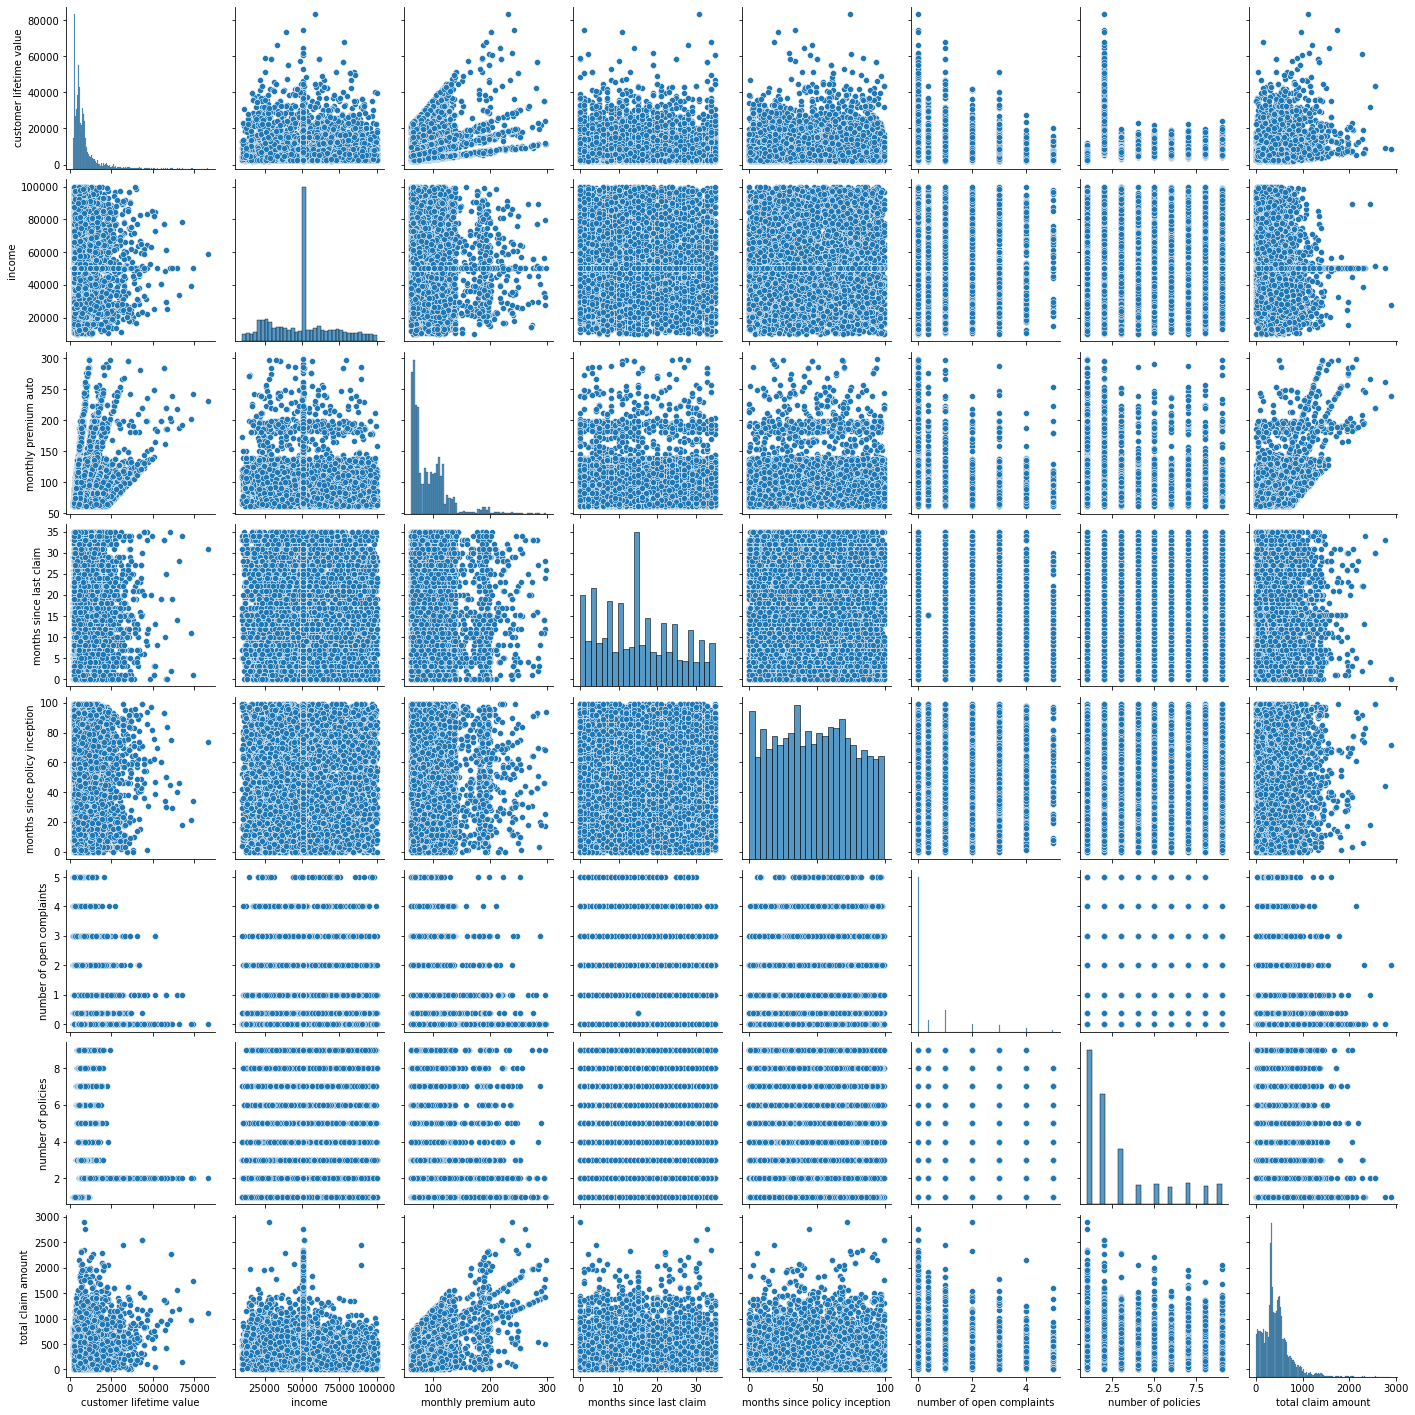

In [12]:
# Plot the numerical data to check for correlation
sns.pairplot(numerical)

#### Cleaning the categorical values

In [78]:
categoricals_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              10279 non-null  object
 1   response           10279 non-null  object
 2   coverage           10910 non-null  object
 3   education          10910 non-null  object
 4   effective to date  10910 non-null  object
 5   employmentstatus   10910 non-null  object
 6   gender             10910 non-null  object
 7   location code      10910 non-null  object
 8   marital status     10910 non-null  object
 9   policy type        10910 non-null  object
 10  policy             10910 non-null  object
 11  renew offer type   10910 non-null  object
 12  sales channel      10910 non-null  object
 13  vehicle class      10288 non-null  object
 14  vehicle size       10288 non-null  object
 15  vehicle type       5428 non-null   object
 16  month              10910 non-null  objec

In [79]:
#Checking for null values in the column 'state', 'response', 'vehicle class', 'vehicle size' - 5,7%
categoricals_features['state'].isnull().mean()

0.05783684692942255

In [80]:
#Checking for the sum of the missing values
categoricals_features['state'].isnull().sum()

631

In [81]:
categoricals_features['vehicle type'].isnull().mean()

0.5024747937671861

<AxesSubplot:>

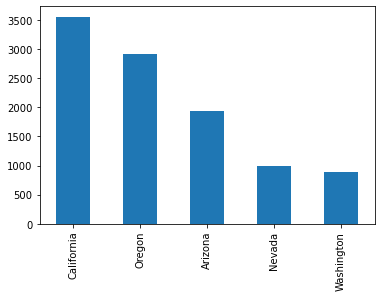

In [82]:
# let's check the most frequent value of the column
categoricals_features['state'].value_counts().plot.bar()

In [83]:
# Replacing the missing value with the mode , function for pipeline?
categoricals_features['state'].fillna('California', inplace=True)

/Applications/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [84]:
categoricals_features['response'].fillna('No', inplace=True)

<AxesSubplot:>

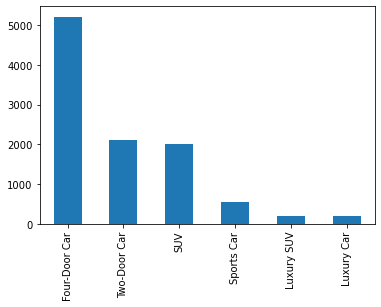

In [85]:
categoricals_features['vehicle class'].value_counts().plot.bar()

In [86]:
categoricals_features['vehicle class'].fillna('Four-Door Car', inplace=True)

In [87]:
categoricals_features['vehicle size'].fillna('Medsize', inplace=True)

Droping columns

In [93]:
# Drop the column 'vehicle type' , because of the 50% missing values
categoricals_features = categoricals_features.drop('vehicle type', axis=1)
# Drop the column 'month'
categoricals_features = categoricals_features.drop('month', axis=1)
# Drop the column 'effective to date'
categoricals_features_nom = categoricals_features.drop('effective to date', axis=1)

## Encoding categorical values

In [94]:
# select columns with datatype 'object' and assign them to the variable categorical_features
categoricals_features = insurance_df.select_dtypes("object")
categoricals_features

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,feburary
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,january
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,feburary
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,january
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,january
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,january
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN,feburary
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,feburary


#### Encoding ordinal variables

In [88]:
categoricals_features_ord = categoricals_features[['education', 'vehicle size']]
categories = [["High School or Below", "College", "Bachelor", "Master", "Doctor"], ["Not Defined", "Small", "Medsize", "Large"]]

ordinal_features = OrdinalEncoder(categories=categories)
encoded_ordinal = pd.DataFrame(ordinal_features.fit_transform(categoricals_features_ord), columns=categoricals_features_ord.columns)

In [89]:
encoded_ordinal

,education,vehicle size
0,1.0,2.0
1,1.0,2.0
2,2.0,2.0
3,1.0,2.0
4,2.0,2.0
...,...,...
10905,2.0,2.0
10906,1.0,2.0
10907,2.0,2.0
10908,1.0,2.0


#### Encoding nominal variables

In [106]:
categoricals_features_nom = categoricals_features.drop('education', axis=1)

In [107]:
categoricals_features_nom = categoricals_features.drop('vehicle size', axis=1)

In [108]:
categoricals_features_nom = categoricals_features.drop('month', axis=1)

In [110]:
categoricals_features_nom = categoricals_features.drop(categoricals_features_ord.columns, axis=1)

In [111]:
categoricals_features_nom

,state,response,coverage,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle type,month
0,Arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,NaN,feburary
1,California,No,Basic,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,NaN,january
2,Washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,A,feburary
3,Oregon,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,A,january
4,Oregon,No,Premium,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,NaN,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,A,january
10906,Oregon,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,A,january
10907,Arizona,No,Extended,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,NaN,feburary
10908,California,No,Premium,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,A,feburary


In [112]:
categorical_cols=pd.get_dummies(categoricals_features_nom, drop_first=True)

In [113]:
categorical_cols

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,...,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,month_january
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
10906,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
10907,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
10908,1,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


#### Drop numerical columns of less importance

In [35]:
#numerical.drop()

In [36]:
insurance_df['customer lifetime value'].describe()

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: customer lifetime value, dtype: float64

### Predictive Modeling

#### X Y split

In [114]:
X = insurance_df.drop('total claim amount', axis=1)
y = insurance_df['total claim amount']

In [115]:
X = X._get_numeric_data()
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029.000,61,7.000000,52,0.000000,9
1,2228.525238,50414.978,64,3.000000,26,0.000000,1
2,14947.917300,22139.000,100,34.000000,31,0.000000,2
3,22332.439460,49078.000,97,10.000000,3,0.000000,2
4,9025.067525,23675.000,117,15.149071,31,0.384256,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,15.149071,40,0.384256,7
10906,5259.444853,61146.000,65,7.000000,68,0.000000,6
10907,23893.304100,39837.000,201,11.000000,63,0.000000,2
10908,11971.977650,64195.000,158,0.000000,27,4.000000,6


In [116]:
# Adding categorical features
X=pd.concat([X,categorical_cols],axis=1)

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>,
        <AxesSubplot:title={'center':'number of policies'}>],
       [<AxesSubplot:title={'center':'state_California'}>,
        <AxesSubplot:title={'center':'state_Nevada'}>,
        <AxesSubplot:title={'center':'state_Oregon'}>,
        <AxesSubplot:title={'center':'state_Washington'}>,
        <AxesSubplot:title={'center':'response_Yes'}>,
        <AxesSubplot:title={'center':'coverage_Extended'}>,
        <AxesSubplot:title={'center':'coverage_Premium'}>],
       [<AxesSubplot:title={'center':'education_College'}>,
        <AxesSubplot:title={'center':'education_Doctor'}>,
        <AxesSubplot:title={'cen

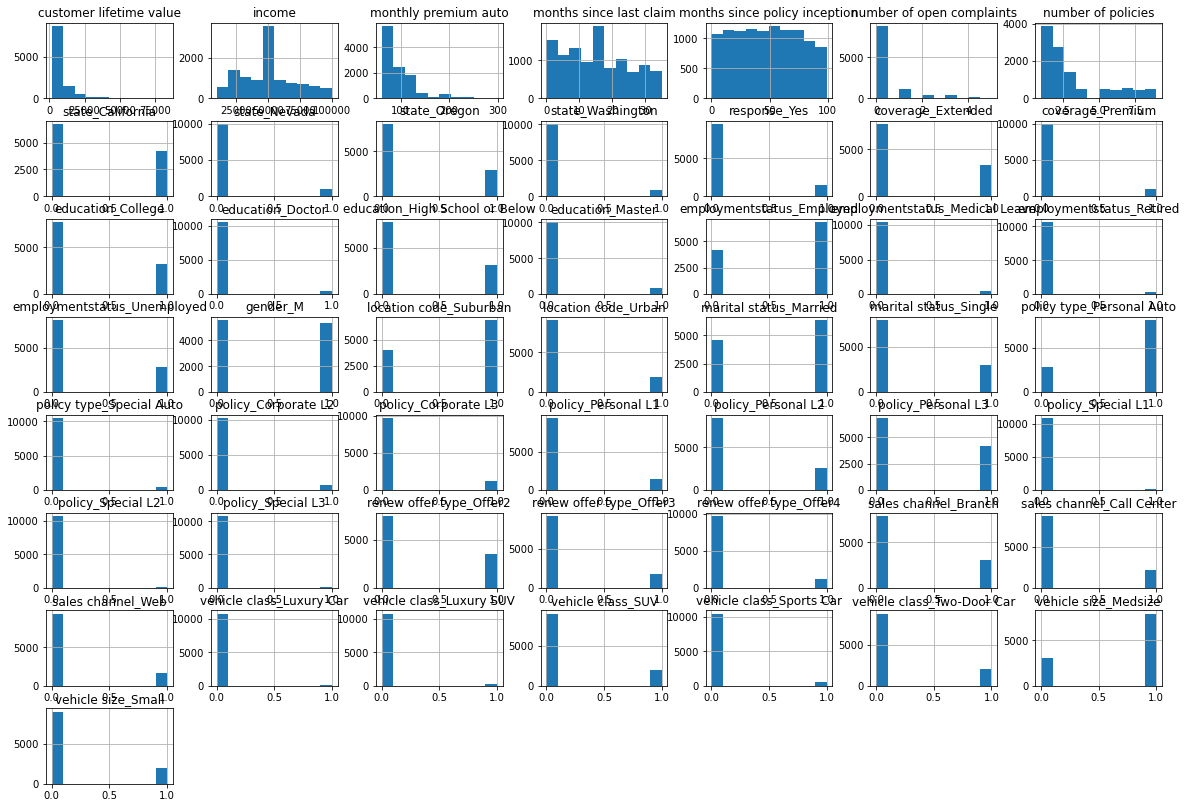

In [40]:
# Show the histograms of the independent variables
X.hist(figsize=(20,14))

## Activity 7

### Linear Regression

#### 1. Data Splitting

In [41]:
# Split the data into a train and test set, to use the test set later for the validation of the model
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### 2. Standardize

In [117]:
# fit() calculates the best parameters for the model
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)

In [118]:
# transform() method  on the test data
X_test_scaled=std_scaler.transform(X_test)

In [119]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-6.70129508e-01 -8.50078307e-01 -1.77408046e-01 ... -4.93361994e-01
   6.31238323e-01 -4.77711657e-01]
 [ 3.04436074e+00 -7.18525577e-01  4.22263292e+00 ... -4.93361994e-01
  -1.58418772e+00  2.09331295e+00]
 [-7.21338256e-02  2.21652770e+00  5.41730577e-02 ... -4.93361994e-01
   6.31238323e-01 -4.77711657e-01]
 ...
 [ 9.78796193e-01  3.51845728e-03  1.32786913e+00 ... -4.93361994e-01
   6.31238323e-01 -4.77711657e-01]
 [ 5.21054160e+00 -1.30872860e+00  1.12523566e+00 ... -4.93361994e-01
   6.31238323e-01 -4.77711657e-01]
 [-8.01183967e-01  1.27255971e+00 -8.43203718e-01 ... -4.93361994e-01
   6.31238323e-01 -4.77711657e-01]]
--------
[[-0.82006016  0.00351846 -0.61162261 ...  2.02690927  0.63123832
  -0.47771166]
 [-0.28953319 -1.44409096 -0.49583206 ... -0.49336199  0.63123832
  -0.47771166]
 [-0.38514774  1.00516239 -0.7563608  ...  2.02690927  0.63123832
  -0.47771166]
 ...
 [-0.74223931  1.45865281 -0.55372734 ... -0.49336199  0.63123832
  -0.47771166]
 [ 0.63136522 -0.67579987 

In [120]:
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029.000,61,7.000000,52,0.000000,9,292.800000
1,2228.525238,50414.978,64,3.000000,26,0.000000,1,744.924331
2,14947.917300,22139.000,100,34.000000,31,0.000000,2,480.000000
3,22332.439460,49078.000,97,10.000000,3,0.000000,2,484.013411
4,9025.067525,23675.000,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,15.149071,40,0.384256,7,1214.400000
10906,5259.444853,61146.000,65,7.000000,68,0.000000,6,273.018929
10907,23893.304100,39837.000,201,11.000000,63,0.000000,2,381.306996
10908,11971.977650,64195.000,158,0.000000,27,4.000000,6,618.288849


#### 3. Applying linear regression

In [121]:
# Modeling using scikit learn
# Model fitting
model=LinearRegression()

In [122]:
# Model train
model.fit(X_train_scaled, y_train)

LinearRegression()

In [123]:
#Get model parameters for coeffient
model.coef_

array([-6.70625175e-01, -5.04948058e+00,  1.88312091e+02,  5.22638040e+00,
        1.74182838e-01, -1.74263228e+00,  3.21523823e+00,  1.35366812e+00,
        1.68442135e+00,  8.49449752e-01,  3.49655332e+00, -7.64354664e+00,
       -8.35062430e+00, -6.37832809e+00, -5.03511584e+00, -2.21838785e+00,
        4.19199724e+00, -3.81674660e+00, -1.30008884e+00,  3.46575739e+00,
        6.81668040e-01,  3.80970644e+01,  6.32811285e+00,  1.83890020e+02,
        8.52617145e+01, -2.21975724e+00,  2.84560090e+01,  7.54116153e+13,
       -2.00648037e+13, -3.69218082e-01,  1.51178267e+00, -5.83248860e+13,
       -7.27847468e+13, -8.41283203e+13,  7.95601888e+12,  1.36483868e+13,
        1.27677185e+13,  7.13877277e+00,  3.70111054e+00,  3.10195188e+00,
        6.07430941e-01, -1.30089076e+00, -9.94910111e-02, -4.42708385e+00,
       -6.21745909e+00, -9.91176163e+00, -7.57556375e+00, -1.11323242e+00,
       -2.39936638e+00,  1.42754152e+00])

In [124]:
model.intercept_

434.14073126567695

#### 4. Model Interpretation

In [125]:
# Making prediction, using the X_test_scaled
y_pred=model.predict(X_test_scaled)   

In [126]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: total claim amount, Length: 3273, dtype: float64

In [127]:
#Making prediction, using the X_train_scaled
y_train_pred=model.predict(X_train_scaled)

In [128]:
y_train_pred

array([ 480.733339  , 1259.33213239,   93.68373714, ...,  761.44443436,
        758.33490027,  158.04428644])

#### Estimated value

In [129]:
y_pred

array([556.10260493, 378.5477033 , -13.65182714, ...,  31.26808211,
       409.09075965, 826.15207306])

#### Plot the y_test and y_pred in the following three plots

In [130]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

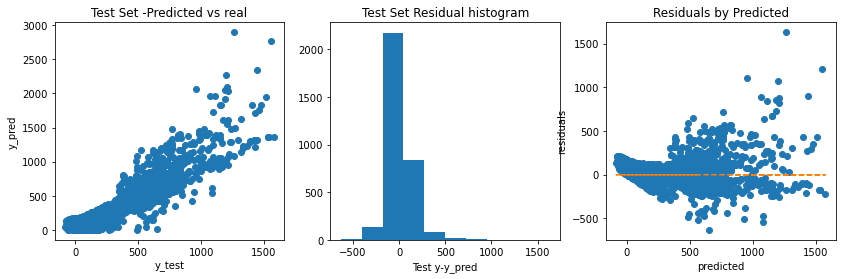

In [131]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

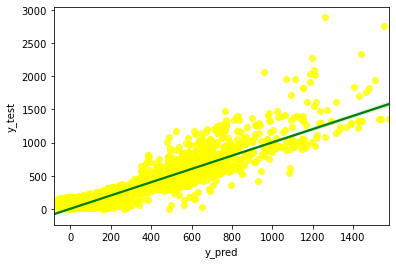

In [57]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "yellow"}, line_kws={"color": "green"})

### Model Validation

#### MSE - Mean Squared Error

In [132]:
print(mse(y_test,y_pred))

19682.528718228114


In [133]:
print(mse)

<function mean_squared_error at 0x7fb680a47940>


#### RMSE - Root Mean Squared Error

In [134]:
rmse = math.sqrt(mse)
rmse

TypeError: must be real number, not function

#### MAE - Mean Absolute Error

In [135]:
print(mae(y_test,y_pred))

95.43565396006439


#### R2 

In [136]:
#Calculating the R2 to check the accuracy of the variance between test and predicted parameters
R2_test=r2_score(y_test,y_pred)
R2_test

0.772270759802163

In [137]:
# Using r2_score
R2_train=r2_score(y_train, y_train_pred)
R2_train

0.7696540378452805

In [138]:
# Using model.score
R2_train=model.score(X_train_scaled,y_train)
R2_train

0.7696540378452805

#### Adjusted R2

In [139]:
# Get the size of the array
X_test.shape[1]

50

In [140]:
X_train.shape[1]

50

In [141]:
#Adjusted R2 for the test set
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2_test

0.7687367864905889

In [142]:
#Adjusted R2 for the train set
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2_train

0.7681358071429689

#### Feature Importance

In [143]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [63]:
features_importances

,Attribute,Importance
33,policy_Personal L3,8.412832e+13
27,policy type_Personal Auto,7.541162e+13
32,policy_Personal L2,7.278475e+13
31,policy_Personal L1,5.832489e+13
28,policy type_Special Auto,2.006480e+13
35,policy_Special L2,1.364839e+13
36,policy_Special L3,1.276772e+13
34,policy_Special L1,7.956019e+12
2,monthly premium auto,1.883121e+02
23,location code_Suburban,1.838900e+02


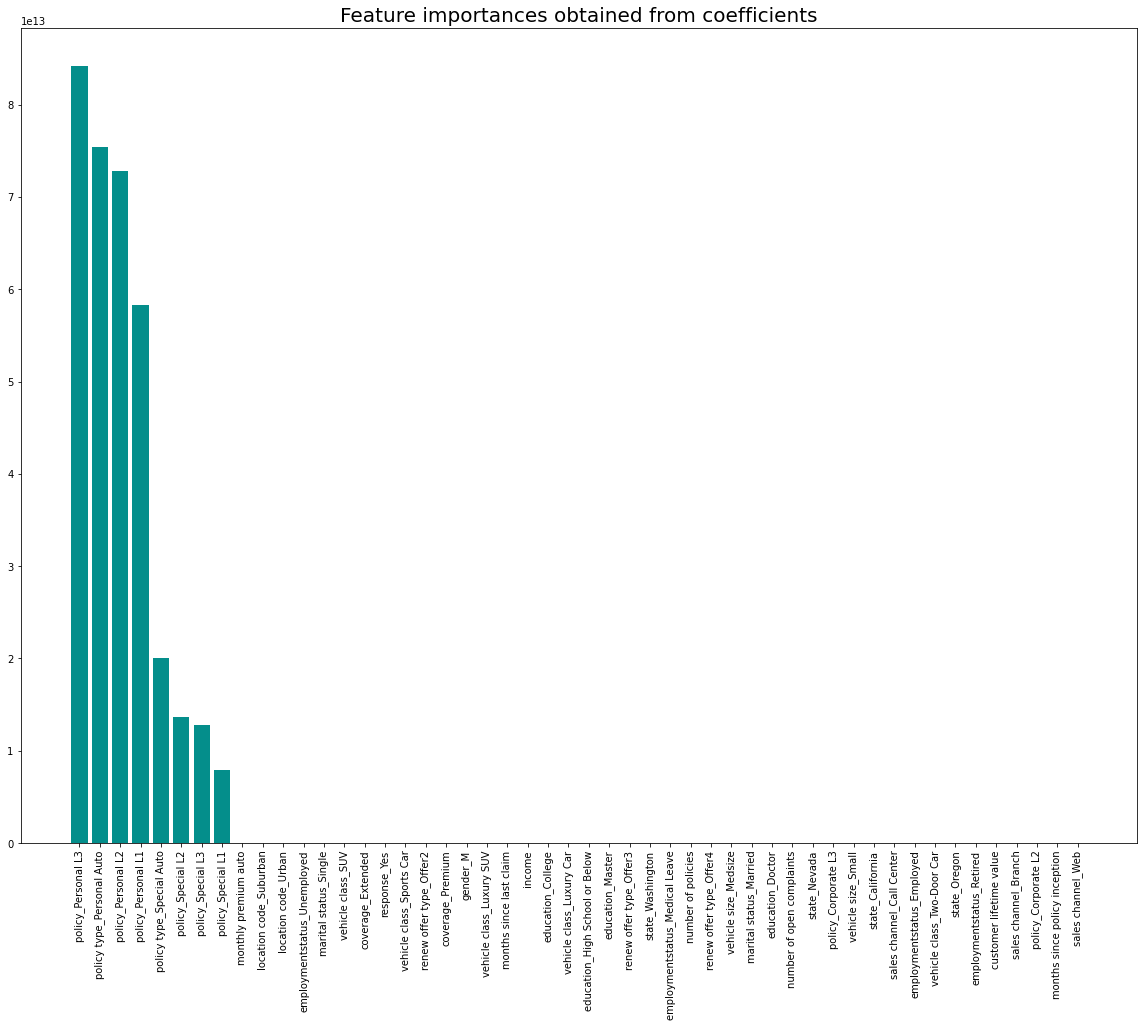

In [66]:
plt.figure(figsize=(20,15))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#048E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Write to csv

In [ ]:
# insurance_df.to_csv("data/customer_analysis_case_study_transformed.csv")